In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import sklearn
import nltk
from nltk.corpus import stopwords

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Dataset
# repository https://github.com/iresiragusa/NLP/tree/main
# https://www.kaggle.com/datasets/yufengdev/bbc-fulltext-and-category?select=bbc-text.csv
# scarichiamo il dataset e lo carichiamo su COLAB

root = '/content/gdrive/MyDrive/Colab Notebooks/torch/'
df = pd.read_csv(root+"data/BBC-text/bbc-text.csv")

In [3]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


n sample ->  2225
5 {'tech', 'entertainment', 'politics', 'sport', 'business'}
category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64


<Axes: xlabel='category'>

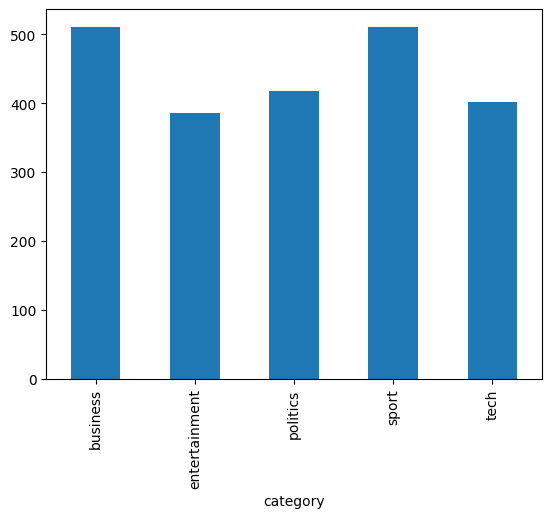

In [4]:
# il dataset è formato da 2225 sample contenenti aricoli della BBC
# suddivisi in 5 categorie in base al loro topic

print('n sample -> ', len(df))
labels = set(df['category'])
print(len(labels), labels)
print(df['category'].value_counts())
df.groupby(['category']).size().plot.bar()

In [5]:
print(df.at[3, 'text'])
print(df.at[3, 'category'])

yeading face newcastle in fa cup premiership side newcastle united face a trip to ryman premier league leaders yeading in the fa cup third round.  the game - arguably the highlight of the draw - is a potential money-spinner for non-league yeading  who beat slough in the second round. conference side exeter city  who knocked out doncaster on saturday  will travel to old trafford to meet holders manchester united in january. arsenal were drawn at home to stoke and chelsea will play host to scunthorpe. the only other non-league side in the draw are hinckley united  who held brentford to a goalless draw on sunday. they will meet league one leaders luton if they win their replay against martin allen s team at griffin park.  a number of premiership teams face difficult away games against championship sides on the weekend of 8/9 january. third-placed everton visit plymouth  liverpool travel to burnley  crystal palace go to sunderland  fulham face carling cup semi-finalists watford  bolton mee

**Tokenization**

In [6]:
# https://www.nltk.org/

nltk.download('punkt') #it contains data for the library (tokenizers and corpora)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
s = 'The quick brown fox, jumps over: the lazy dog.'
t = nltk.word_tokenize(s)
print(t)

['The', 'quick', 'brown', 'fox', ',', 'jumps', 'over', ':', 'the', 'lazy', 'dog', '.']


In [8]:
import re

s = 'The quick brown fox, jumps over: the lazy dog.'
print(s)
s = re.sub(f'[^\w]+', ' ', s)
print(s)
t = nltk.word_tokenize(s)
print(t)

The quick brown fox, jumps over: the lazy dog.
The quick brown fox jumps over the lazy dog 
['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']


**Stemming**

In [9]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')

stem = [stemmer.stem(w) for w in t]
print(stem)

['the', 'quick', 'brown', 'fox', 'jump', 'over', 'the', 'lazi', 'dog']


**Lemmatization**

In [10]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
print(wnl.lemmatize('dogs'))

[nltk_data] Downloading package wordnet to /root/nltk_data...


dog


**Stopwords**

In [11]:
nltk.download('stopwords')

stop = stopwords.words('english')
print(f'there are {len(stop)} stopwords\n')
print(stop)

there are 179 stopwords

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
# w/o stemming
print(t)
# lower words
filtered_s = [w for w in t if not w.lower() in stop]
print(filtered_s)
# w/o lower words
filtered_s2 = [w for w in t if not w in stop]
print(filtered_s2)
# stemming
filtered_s3 = [stemmer.stem(w) for w in t]
print(filtered_s3)

['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog']
['The', 'quick', 'brown', 'fox', 'jumps', 'lazy', 'dog']
['the', 'quick', 'brown', 'fox', 'jump', 'over', 'the', 'lazi', 'dog']


In [25]:
# tokenization over dataset
df['tokenized'] = df['text'].apply(lambda x: nltk.word_tokenize(re.sub(f'[^\w]+', ' ', x)))
# removing stopwords over dataset
df['filtered'] = df['tokenized'].apply(lambda x: [w for w in x if not w.lower() in stop])
# stemming over dataset
df['stemmed'] = df['filtered'].apply(lambda x: [stemmer.stem(w) for w in x])

print(df.at[3, 'text'])
print(df.at[3, 'tokenized'])
print(df.at[3, 'filtered'])
print(df.at[3, 'stemmed'])

yeading face newcastle in fa cup premiership side newcastle united face a trip to ryman premier league leaders yeading in the fa cup third round.  the game - arguably the highlight of the draw - is a potential money-spinner for non-league yeading  who beat slough in the second round. conference side exeter city  who knocked out doncaster on saturday  will travel to old trafford to meet holders manchester united in january. arsenal were drawn at home to stoke and chelsea will play host to scunthorpe. the only other non-league side in the draw are hinckley united  who held brentford to a goalless draw on sunday. they will meet league one leaders luton if they win their replay against martin allen s team at griffin park.  a number of premiership teams face difficult away games against championship sides on the weekend of 8/9 january. third-placed everton visit plymouth  liverpool travel to burnley  crystal palace go to sunderland  fulham face carling cup semi-finalists watford  bolton mee

**N-grams**

In [26]:
print(df.at[3, 'stemmed'])

# generate bigrams/trigrams
ngrams = list(nltk.ngrams(df.at[3, 'stemmed'], 3))

print(ngrams)

['yead', 'face', 'newcastl', 'fa', 'cup', 'premiership', 'side', 'newcastl', 'unit', 'face', 'trip', 'ryman', 'premier', 'leagu', 'leader', 'yead', 'fa', 'cup', 'third', 'round', 'game', 'arguabl', 'highlight', 'draw', 'potenti', 'money', 'spinner', 'non', 'leagu', 'yead', 'beat', 'slough', 'second', 'round', 'confer', 'side', 'exet', 'citi', 'knock', 'doncast', 'saturday', 'travel', 'old', 'trafford', 'meet', 'holder', 'manchest', 'unit', 'januari', 'arsenal', 'drawn', 'home', 'stoke', 'chelsea', 'play', 'host', 'scunthorp', 'non', 'leagu', 'side', 'draw', 'hinckley', 'unit', 'held', 'brentford', 'goalless', 'draw', 'sunday', 'meet', 'leagu', 'one', 'leader', 'luton', 'win', 'replay', 'martin', 'allen', 'team', 'griffin', 'park', 'number', 'premiership', 'team', 'face', 'difficult', 'away', 'game', 'championship', 'side', 'weekend', '8', '9', 'januari', 'third', 'place', 'everton', 'visit', 'plymouth', 'liverpool', 'travel', 'burnley', 'crystal', 'palac', 'go', 'sunderland', 'fulham',

In [23]:
# nel dataframe i nostri input devono essere dei testi e non delle liste
# concateniamo quindi gli elementi delle liste con la funzione join in modo da avere solo stringe

df['tokenized_text'] = df['tokenized'].apply(lambda x: " ".join(x))
df['filtered_text'] = df['filtered'].apply(lambda x: " ".join(x))
df['cured_text'] = df['stemmed'].apply(lambda x: " ".join(x))

print(df.at[3, 'tokenized'])
print(df.at[3, 'tokenized_text'])

print(df.at[3, 'filtered'])
print(df.at[3, 'filtered_text'])

print(df.at[3, 'stemmed'])
print(df.at[3, 'cured_text'])

['yeading', 'face', 'newcastle', 'in', 'fa', 'cup', 'premiership', 'side', 'newcastle', 'united', 'face', 'a', 'trip', 'to', 'ryman', 'premier', 'league', 'leaders', 'yeading', 'in', 'the', 'fa', 'cup', 'third', 'round', 'the', 'game', 'arguably', 'the', 'highlight', 'of', 'the', 'draw', 'is', 'a', 'potential', 'money', 'spinner', 'for', 'non', 'league', 'yeading', 'who', 'beat', 'slough', 'in', 'the', 'second', 'round', 'conference', 'side', 'exeter', 'city', 'who', 'knocked', 'out', 'doncaster', 'on', 'saturday', 'will', 'travel', 'to', 'old', 'trafford', 'to', 'meet', 'holders', 'manchester', 'united', 'in', 'january', 'arsenal', 'were', 'drawn', 'at', 'home', 'to', 'stoke', 'and', 'chelsea', 'will', 'play', 'host', 'to', 'scunthorpe', 'the', 'only', 'other', 'non', 'league', 'side', 'in', 'the', 'draw', 'are', 'hinckley', 'united', 'who', 'held', 'brentford', 'to', 'a', 'goalless', 'draw', 'on', 'sunday', 'they', 'will', 'meet', 'league', 'one', 'leaders', 'luton', 'if', 'they', 'w

In [24]:
df.head()

,category,text,tokenized,filtered,stemmed,cured_text,tokenized_text,filtered_text
0,tech,tv future in the hands of viewers with home th...,"[tv, future, in, the, hands, of, viewers, with...","[tv, future, hands, viewers, home, theatre, sy...","[tv, futur, hand, viewer, home, theatr, system...",tv futur hand viewer home theatr system plasma...,tv future in the hands of viewers with home th...,tv future hands viewers home theatre systems p...
1,business,worldcom boss left books alone former worldc...,"[worldcom, boss, left, books, alone, former, w...","[worldcom, boss, left, books, alone, former, w...","[worldcom, boss, left, book, alon, former, wor...",worldcom boss left book alon former worldcom b...,worldcom boss left books alone former worldcom...,worldcom boss left books alone former worldcom...
2,sport,tigers wary of farrell gamble leicester say ...,"[tigers, wary, of, farrell, gamble, leicester,...","[tigers, wary, farrell, gamble, leicester, say...","[tiger, wari, farrel, gambl, leicest, say, rus...",tiger wari farrel gambl leicest say rush make ...,tigers wary of farrell gamble leicester say th...,tigers wary farrell gamble leicester say rushe...
3,sport,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, in, fa, cup, premie...","[yeading, face, newcastle, fa, cup, premiershi...","[yead, face, newcastl, fa, cup, premiership, s...",yead face newcastl fa cup premiership side new...,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
4,entertainment,ocean s twelve raids box office ocean s twelve...,"[ocean, s, twelve, raids, box, office, ocean, ...","[ocean, twelve, raids, box, office, ocean, twe...","[ocean, twelv, raid, box, offic, ocean, twelv,...",ocean twelv raid box offic ocean twelv crime c...,ocean s twelve raids box office ocean s twelve...,ocean twelve raids box office ocean twelve cri...


In [27]:
(x_train, x_test, y_train, y_test) = sklearn.model_selection.train_test_split(df['cured_text'], df['category'], test_size = 0.2, random_state = 17)

print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

1780 1780
445 445


In [18]:
# oltre ad usare NLTK, possiamo usare CountVectorizer di sklearn per generare i
# ngrams ma questo metodo implementa anche una vettorizzazione, che ci serve
# per la successiva fase di classificazione

# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

vectorizer = sklearn.feature_extraction.text.CountVectorizer(ngram_range=(2,2))
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.transform(x_test)

In [19]:
print(X_train.shape)
print(X_test.shape)

# la seconda dimensione è la grandezza del vocabolario/feature

(1780, 266531)
(445, 266531)


In [28]:
# overview delle feature/elementi del vocabolario, tutti gli n-gramns generati a partire dal training set
print(vectorizer.get_feature_names_out())
#versione vettoriale del primo sample
print(X_train[0].toarray())
# è un vettore riga in "one-hot encoding" ma ho le frequenze

['00 59' '00 earli' '00 qualifi' ... 'zvonareva struggl'
 'zvonareva wimbledon' 'zvyagintsev return']
[[0 0 0 ... 0 0 0]]


In [21]:
for element in X_train[0]:
    print(element)

  (0, 217298)	2
  (0, 116470)	2
  (0, 37953)	1
  (0, 102842)	1
  (0, 22073)	1
  (0, 96317)	1
  (0, 226801)	2
  (0, 201071)	1
  (0, 37885)	2
  (0, 22071)	1
  (0, 90973)	1
  (0, 54734)	1
  (0, 205608)	3
  (0, 97640)	1
  (0, 244979)	1
  (0, 222927)	1
  (0, 203750)	1
  (0, 88346)	1
  (0, 127875)	1
  (0, 223956)	1
  (0, 23872)	1
  (0, 217264)	1
  (0, 29454)	1
  (0, 123972)	1
  (0, 97321)	1
  :	:
  (0, 2757)	1
  (0, 217051)	1
  (0, 95832)	1
  (0, 229366)	1
  (0, 220025)	1
  (0, 42292)	1
  (0, 207887)	1
  (0, 160898)	1
  (0, 246850)	1
  (0, 241138)	1
  (0, 5479)	1
  (0, 217475)	1
  (0, 216971)	1
  (0, 2809)	1
  (0, 2841)	1
  (0, 211501)	1
  (0, 97088)	1
  (0, 153336)	1
  (0, 125614)	1
  (0, 250681)	1
  (0, 238189)	1
  (0, 30093)	1
  (0, 242234)	1
  (0, 12939)	1
  (0, 41709)	1


In [29]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
preds = classifier.predict(X_test)

print(f'Accuacy -> {accuracy_score(y_test, preds):0.4f}')
print(f"F1-score -> {f1_score(y_test, preds, average='macro'):0.4f}")
print(f"Precision -> {precision_score(y_test, preds, average='macro'):0.4f}")
print(f"Recall -> {recall_score(y_test, preds, average='macro'):0.4f}")

print(classification_report(y_test, preds))

Accuacy -> 0.7820
F1-score -> 0.7854
Precision -> 0.8062
Recall -> 0.7826
               precision    recall  f1-score   support

     business       0.79      0.79      0.79       107
entertainment       0.54      0.81      0.65        74
     politics       0.99      0.77      0.86        90
        sport       0.84      0.76      0.80        93
         tech       0.88      0.78      0.82        81

     accuracy                           0.78       445
    macro avg       0.81      0.78      0.79       445
 weighted avg       0.81      0.78      0.79       445



In [31]:
from sklearn.model_selection import train_test_split
def classification_procedure(df, feature, n_grams):
    (x_train, x_test, y_train, y_test) = train_test_split(df[feature], df['category'], test_size=0.2, random_state=17)
    vectorizer = sklearn.feature_extraction.text.CountVectorizer(ngram_range = (n_grams, n_grams))
    X_train = vectorizer.fit_transform(x_train)
    X_test = vectorizer.transform(x_test)

    classifier = DecisionTreeClassifier()
    classifier.fit(X_train, y_train)

    preds = classifier.predict(X_test)

    print('MODEL -> '+feature+'-'+str(n_grams))

    print(f'Accuacy -> {accuracy_score(y_test, preds):0.4f}')
    print(f"F1-score -> {f1_score(y_test, preds, average='macro'):0.4f}")
    print(f"Precision -> {precision_score(y_test, preds, average='macro'):0.4f}")
    print(f"Recall -> {recall_score(y_test, preds, average='macro'):0.4f}")

    print(classification_report(y_test, preds))

In [32]:
classification_procedure(df, feature='cured_text', n_grams=2)

MODEL -> cured_text-2
Accuacy -> 0.7775
F1-score -> 0.7811
Precision -> 0.8010
Recall -> 0.7780
               precision    recall  f1-score   support

     business       0.79      0.78      0.78       107
entertainment       0.53      0.78      0.63        74
     politics       0.97      0.76      0.85        90
        sport       0.84      0.78      0.81        93
         tech       0.88      0.79      0.83        81

     accuracy                           0.78       445
    macro avg       0.80      0.78      0.78       445
 weighted avg       0.81      0.78      0.79       445



In [33]:
classification_procedure(df, feature='cured_text', n_grams=3)

MODEL -> cured_text-3
Accuacy -> 0.6921
F1-score -> 0.7040
Precision -> 0.8492
Recall -> 0.6722
               precision    recall  f1-score   support

     business       0.46      0.98      0.62       107
entertainment       0.97      0.42      0.58        74
     politics       0.95      0.63      0.76        90
        sport       0.92      0.62      0.74        93
         tech       0.95      0.70      0.81        81

     accuracy                           0.69       445
    macro avg       0.85      0.67      0.70       445
 weighted avg       0.83      0.69      0.70       445



Ripetere questi passaggi anche col il dataset [med_transcripts.csv](https://github.com/iresiragusa/NLP/blob/main/datasets/med_transcripts.csv)

Multiclass dataset of medical transcriptions divided in 40 medical specialities.

    Text to classify -> transcription
    Labels -> medical_specialty

**!! Dataset sbilanciato** come possiamo modificare il dataset?

    - undersampling
    - top n labels
    - stratified sampling
    - remove samples from numerous classes